In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
lights_types = ["no_adaptive", "adaptive"]
traffic_types = ["low_traffic", "mid_traffic", "high_traffic"]

def load_data_exp_light_type(lights_type, traffic_type):
    pds = []
    for i in range(3):
        filename = f"metrics/light_types_traffic/{lights_type}_{traffic_type}_{i+1}.csv"
        df = pd.read_csv(filename)
        df["idx"] = i + 1
        pds.append(df)
    print(len(pds), "files loaded for", lights_type, traffic_type)
    return pd.concat(pds, ignore_index=True, axis=0)

In [ ]:
df = load_data_exp_light_type(lights_types[1], traffic_types[2])
df2 = df[df["Time"] > 30.0]
df2.groupby("idx")["TotalTraffic"].mean()

idx
1    453.569767
2    468.322430
3    451.040373
Name: TotalTraffic, dtype: float64

3 files loaded for no_adaptive low_traffic
3 files loaded for adaptive low_traffic
3 files loaded for no_adaptive mid_traffic
3 files loaded for adaptive mid_traffic
3 files loaded for no_adaptive high_traffic
3 files loaded for adaptive high_traffic


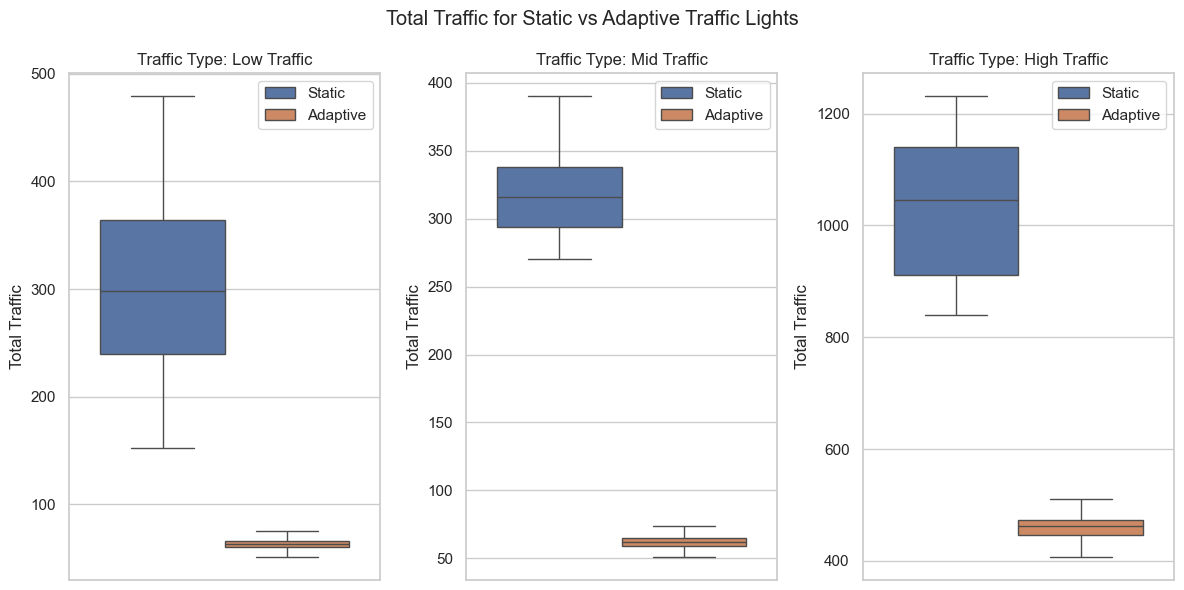

In [46]:
# for traffic_type in traffic_types:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
for i, traffic_type in enumerate(traffic_types):
    df_static = load_data_exp_light_type(lights_types[0], traffic_type)
    df_adaptive = load_data_exp_light_type(lights_types[1], traffic_type)

    df_static["type"] = "Static"
    df_adaptive["type"] = "Adaptive"
    df = pd.concat([df_static, df_adaptive], ignore_index=True)
    df = df[df["Time"] > 30.0]
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        hue = "type",
        y="TotalTraffic",
        data=df,
        showfliers=False,
    )
    plt.ylabel("Total Traffic")
    plt.title(f"Traffic Type: {traffic_type.replace('_', ' ').title()}")
    plt.legend()

plt.suptitle("Total Traffic for Static vs Adaptive Traffic Lights")
plt.tight_layout()
plt.show()

3 files loaded for no_adaptive low_traffic
3 files loaded for adaptive low_traffic
3 files loaded for no_adaptive mid_traffic
3 files loaded for adaptive mid_traffic
3 files loaded for no_adaptive high_traffic
3 files loaded for adaptive high_traffic


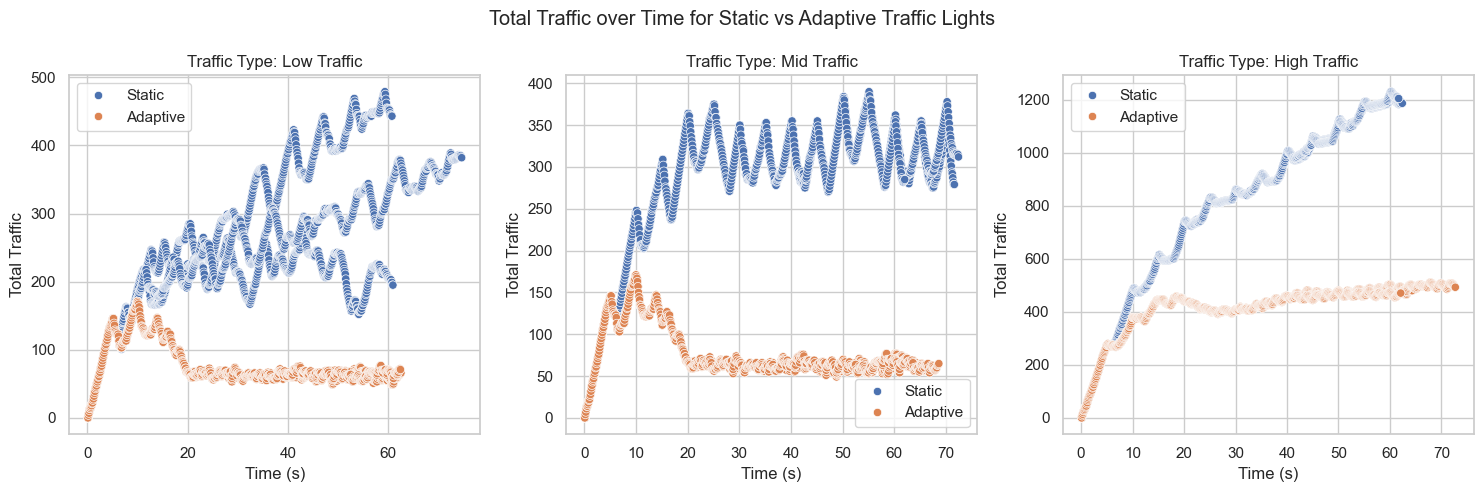

In [48]:
plt.figure(figsize=(15, 5))
sns.set_theme(style="whitegrid")
for i, traffic_type in enumerate(traffic_types):
    df_static = load_data_exp_light_type(lights_types[0], traffic_type)
    df_adaptive = load_data_exp_light_type(lights_types[1], traffic_type)

    df_static["type"] = "Static"
    df_adaptive["type"] = "Adaptive"
    df = pd.concat([df_static, df_adaptive], ignore_index=True)

    plt.subplot(1, 3, i + 1)
    sns.scatterplot(
        x = "Time",
        y = "TotalTraffic",
        hue = "type",
        data=df,
    )
    plt.title(f"Traffic Type: {traffic_type.replace('_', ' ').title()}")
    plt.xlabel("Time (s)")
    plt.ylabel("Total Traffic")
    plt.legend()
plt.suptitle("Total Traffic over Time for Static vs Adaptive Traffic Lights")
plt.tight_layout()
plt.show()

### Experiment 2

In [37]:
def load_data_exp_avg_waiting_time(lights_type):
    pds = []
    for i in range(3):
        filename = f"metrics/average_waiting_time/{lights_type}_{i+1}.csv"
        df = pd.read_csv(filename)
        df["idx"] = i + 1
        pds.append(df)
    print(len(pds), "files loaded for", lights_type, traffic_type)
    return pd.concat(pds, ignore_index=True, axis=0)

In [38]:
load_data_exp_avg_waiting_time(lights_types[0])

3 files loaded for no_adaptive high_traffic


,Unnamed: 0,Time,TotalTraffic,AverageTraffic,SpecialVehicles,AverageWaitingTime,idx
0,0,0.1,0,0.000000,[],0.000000,1
1,1,0.2,8,0.305556,[],3.835856,1
2,2,0.3,14,0.500000,[],3.760488,1
3,3,0.4,21,0.722222,[],3.265860,1
4,4,0.5,27,0.916667,[],3.822542,1
...,...,...,...,...,...,...,...
1943,641,64.2,1247,42.277778,[],19.647238,3
1944,642,64.3,1250,42.361111,[],19.678033,3
1945,643,64.4,1252,42.513889,[],19.717147,3
1946,644,64.5,1257,42.569444,[],19.706325,3


3 files loaded for no_adaptive high_traffic
3 files loaded for adaptive high_traffic


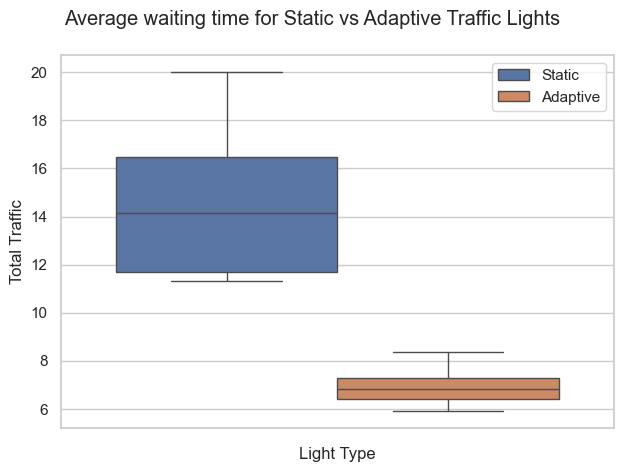

In [60]:
# plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
df_static = load_data_exp_avg_waiting_time(lights_types[0])
df_adaptive = load_data_exp_avg_waiting_time(lights_types[1])

df_static["type"] = "Static"
df_adaptive["type"] = "Adaptive"
df = pd.concat([df_static, df_adaptive], ignore_index=True)
df = df[df["Time"] > 30.0]
sns.boxplot(
    hue = "type",
    y="AverageWaitingTime",
    data=df,
    showfliers=False,
)
plt.xlabel("Light Type")
plt.ylabel("Total Traffic")
plt.suptitle("Average waiting time for Static vs Adaptive Traffic Lights")
plt.legend()
plt.tight_layout()
plt.show()

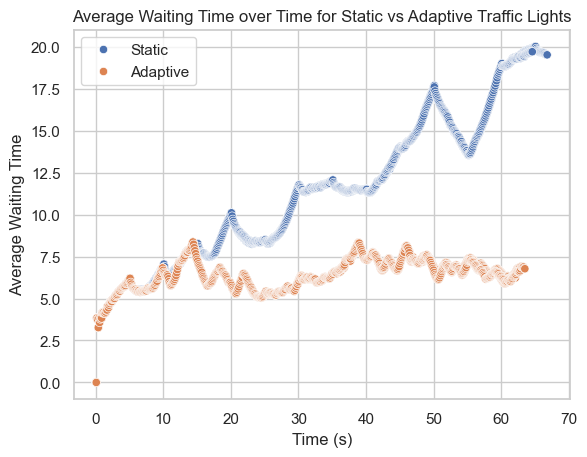

In [61]:
df_static["type"] = "Static"
df_adaptive["type"] = "Adaptive"
df = pd.concat([df_static, df_adaptive], ignore_index=True)

sns.scatterplot(
    x = "Time",
    y = "AverageWaitingTime",
    hue = "type",
    data=df,
)
plt.xlabel("Time (s)")
plt.ylabel("Average Waiting Time")
plt.title("Average Waiting Time over Time for Static vs Adaptive Traffic Lights")
plt.legend()
plt.show()

### 3. Ambulances

In [9]:
def load_data_exp_ambulances():
    pds = []
    filename = f"metrics/ambulances/special_policy_1.csv"
    df = pd.read_csv(filename)
    df["idx"] = 1
    pds.append(df)
    filename = f"metrics/ambulances/special_policy_2.csv"
    df = pd.read_csv(filename)
    df["idx"] = 2
    pds.append(df)

    special_policy_df = pd.concat(pds, ignore_index=True, axis=0)

    filename = f"metrics/ambulances/no_special_policy.csv"
    df = pd.read_csv(filename)
    df["idx"] = 1

    special_policy_df["Type"] = "Special policy"
    df["Type"] = "No special policy"

    return pd.concat([special_policy_df, df], axis=0, ignore_index=True)

In [10]:
import json
ambulances_df = load_data_exp_ambulances()
ambulances = []
ambulances_df["SpecialVehicles2"] = ambulances_df["SpecialVehicles"] \
        .transform(lambda x: json.loads(x[1:-1].replace("'", '"'))["time_passed"] if x != '[]' else None)

print(ambulances_df)

      Unnamed: 0   Time  TotalTraffic  AverageTraffic SpecialVehicles  \
0              0    0.1             0        0.000000              []   
1              1    0.2             8        0.305556              []   
2              2    0.3            14        0.500000              []   
3              3    0.4            21        0.722222              []   
4              4    0.5            27        0.916667              []   
...          ...    ...           ...             ...             ...   
6663        3009  301.0          1262       36.569444              []   
6664        3010  301.1          1265       36.750000              []   
6665        3011  301.2          1264       36.527778              []   
6666        3012  301.3          1268       36.708333              []   
6667        3013  301.4          1273       36.888889              []   

      AverageWaitingTime  idx               Type  SpecialVehicles2  
0               0.000000    1     Special policy      

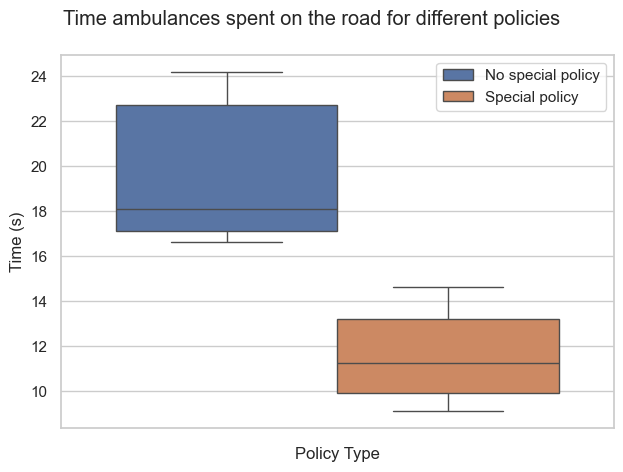

In [15]:
sns.set_theme(style="whitegrid")
df = ambulances_df[ambulances_df["SpecialVehicles2"] != None]

sns.boxplot(
    hue = "Type",
    hue_order=["No special policy", "Special policy"],
    y="SpecialVehicles2",
    data=df,
    showfliers=False,
)
plt.xlabel("Policy Type")
plt.ylabel("Time (s)")
plt.suptitle("Time ambulances spent on the road for different policies")
plt.legend()
plt.tight_layout()
plt.show()

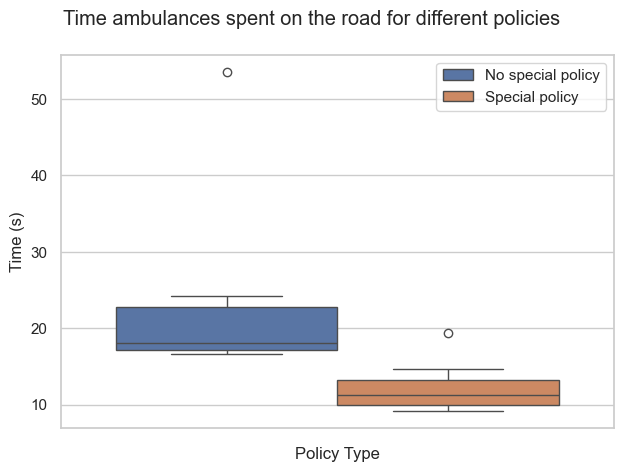

In [16]:
sns.set_theme(style="whitegrid")
df = ambulances_df[ambulances_df["SpecialVehicles2"] != None]

sns.boxplot(
    hue = "Type",
    hue_order=["No special policy", "Special policy"],
    y="SpecialVehicles2",
    data=df,
    showfliers=True,
)
plt.xlabel("Policy Type")
plt.ylabel("Time (s)")
plt.suptitle("Time ambulances spent on the road for different policies")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
means = df.groupby("Type")["SpecialVehicles2"].mean()
stds = df.groupby("Type")["SpecialVehicles2"].std()

In [20]:
means, stds

(Type
 No special policy    24.569816
 Special policy       12.277857
 Name: SpecialVehicles2, dtype: float64,
 Type
 No special policy    14.459252
 Special policy        3.386373
 Name: SpecialVehicles2, dtype: float64)